Accuracy: 66.75%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66       199
         1.0       0.67      0.68      0.67       201

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400


Confusion Matrix:
[[130  69]
 [ 64 137]]

Multivariate Drift Detection:
No Drift! Accuracy bellow boundary -> It is difficult to separate data and therefore no drift exists.


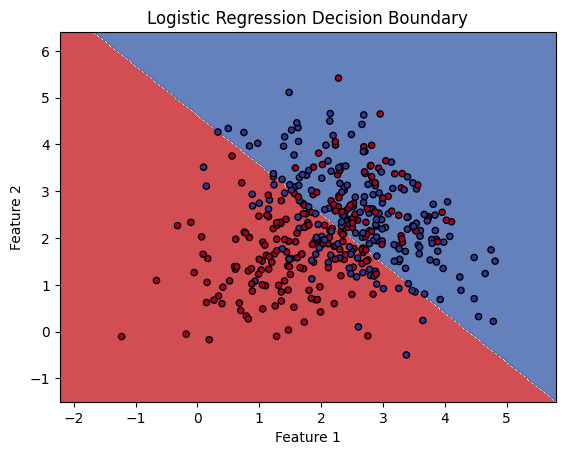

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Generate a synthetic dataset
# Two classes (domains) with distinct distributions
np.random.seed(42)  # For reproducibility
n_samples = 1000

# Class 0: Domain A
historical_data = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], n_samples)

# Class 1: Domain B
# new_data = np.random.multivariate_normal([6, 6], [[1, -0.5], [-0.5, 1]], n_samples)
new_data = np.random.multivariate_normal([2.5, 2.5], [[1, -0.5], [-0.5, 1]], n_samples)

# Combine the data and labels
X = np.vstack((historical_data, new_data))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = clf.predict(X_test)

# Step 5: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display drift detection
print("\nMultivariate Drift Detection:")
boundary = 0.9
if accuracy < 0.9:
    print("No Drift! Accuracy bellow boundary -> It is difficult to separate data and therefore no drift exists.")
else:
    print("Drift! Accuracy above boundary -> It is easy to separate data and therefore there is a drift.")



# Optional: Plot the decision boundary for visualization
def plot_decision_boundary(clf, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(clf, X_test, y_test)
